## Advanced Algorithms Assignment 8 
### Jonathan Harder and Julian Stastny
#### Excercise 3

###### Key Aspects

- We use the Union Find Datastructure to keep track of subsets of the cells. The subsets are defined by the intra-subset reachabilty of the cells
- We remove the walls from the cells until:  

    1) There is a path from the start-cell to the finish-cell (Note: If a wall is already the last wall surrounding a cell, we do not remove it)  
    2) Every cell is reachable

In [1]:
import numpy as np 
from matplotlib import pyplot as plt
# If you don't know numpy: 
# This is just used for enabling arrays in Python and to sample random numbers
# Matplotlib is for showing the image

In [2]:
class UnionFind:
    
    def __init__(self, num_elements):
        self.root_ids = np.arange(num_elements) # make singleton sets
        self.size = np.ones(num_elements) # Singleton sets have size 1
        
    def find(self, x):
        root = self._find(x)
        self._compress(root, x)
        return root
        
    def union(self, x, y):
        root_x = self.find(x)
        root_y = self.find(y)
        
        if root_x != root_y:
            if self.size[root_x] > self.size[root_y]:
                self.root_ids[root_y] = root_x
                self.size[root_x] += self.size[root_y]
            else:
                self.root_ids[root_x] = root_y
                self.size[root_y] += self.size[root_x]
        
    def _find(self, x):
        root = self.root_ids[x]
        if root != x:
            return self._find(self.root_ids[x])
        return root
        
    def _compress(self, root, x):
        parent = self.root_ids[x]
        self.root_ids[x] = root
        if parent != root:
            self._compress(root, parent)

In [3]:
class Maze:

    def build_maze(self, n):
        self._initialize_grid(n)
        self.subpaths = UnionFind(self.num_squares)
        # Round 1: Removing walls until there is a path from start to finish
        while self.subpaths.find(0) != self.subpaths.find(self.num_squares - 1):
            i, j = self._remove_wall_randomly()
            self.subpaths.union(i, j)
        path_id = self.subpaths.find(0)
        # Round 2: Removing walls until every square is reachable
        while len(set(self.subpaths.root_ids)) > 1:
            i = np.random.choice(self.square_ids.flatten()[np.where(self.subpaths.root_ids != path_id)])
            i, j = self._remove_wall_randomly(i)
            self.subpaths.union(i, j)
        print('Removed %d walls.' % (self.walls_removed))
        self._display_maze()
    
    def _initialize_grid(self, n):
        self.n = n
        self.num_squares = n**2
        self.square_ids = np.arange(self.num_squares).reshape((n, n))
        self.grid_size = 10*n+1
        self.grid = np.ones((self.grid_size, self.grid_size))
        walls = list(filter(lambda x: x%10==0, np.arange(self.grid_size)))
        self.grid[walls] = 0
        self.grid[:,walls] = 0
        self.walls_removed = 0
        
    def _remove_wall_randomly(self, i_specific=None):
        candidates = []
        
        i = i_specific
        
        while not candidates: # Checks if candidates contains values
            if i_specific is None: # If no square was specified, we sample one
                i = np.random.randint(0, self.num_squares)
            if i % self.n != self.n - 1: # If there is space to the right
                candidates += [i + 1]
            if i % self.n != 0: # If there is space to the left
                candidates += [i - 1] 
            if i >= self.n: # If there is space upwards
                candidates += [i - self.n]
            if i < self.num_squares - self.n: # If there is space downwards
                candidates += [i + self.n]
        
        if self._count_walls(candidates, i) <= 1 and i_specific is None: 
            # This avoids the formation of big free spaces
            return self._remove_wall_randomly()
        
        j = np.random.choice(candidates)
        self._remove(i, j)
        self.walls_removed += 1
        return i, j
    
    def _remove(self, i, j):
        if i > j:
            return self._remove(j, i)
        i_x, i_y = np.where(self.square_ids == i)
        if j-i == 1: # This means they are horizontal neighbors
            self.grid[np.arange(i_x*10+1, i_x*10+10), i_y*10+10] = 1
        else: # Vertical neighbors
            self.grid[i_x*10+10, np.arange(i_y*10+1, i_y*10+10)] = 1
    
    def _count_walls(self, candidates, i):
        count = 0
        for c in candidates:
            if self.subpaths.find(c) != self.subpaths.find(i):
                count += 1
        return count

    def _display_maze(self):
        fig = plt.figure(figsize=(20, 20))
        plt.axis('off')
        plt.imshow(self.grid, cmap='gray')
        plt.show()
        plt.close()

In [4]:
maze = Maze()

Removed 4619 walls.


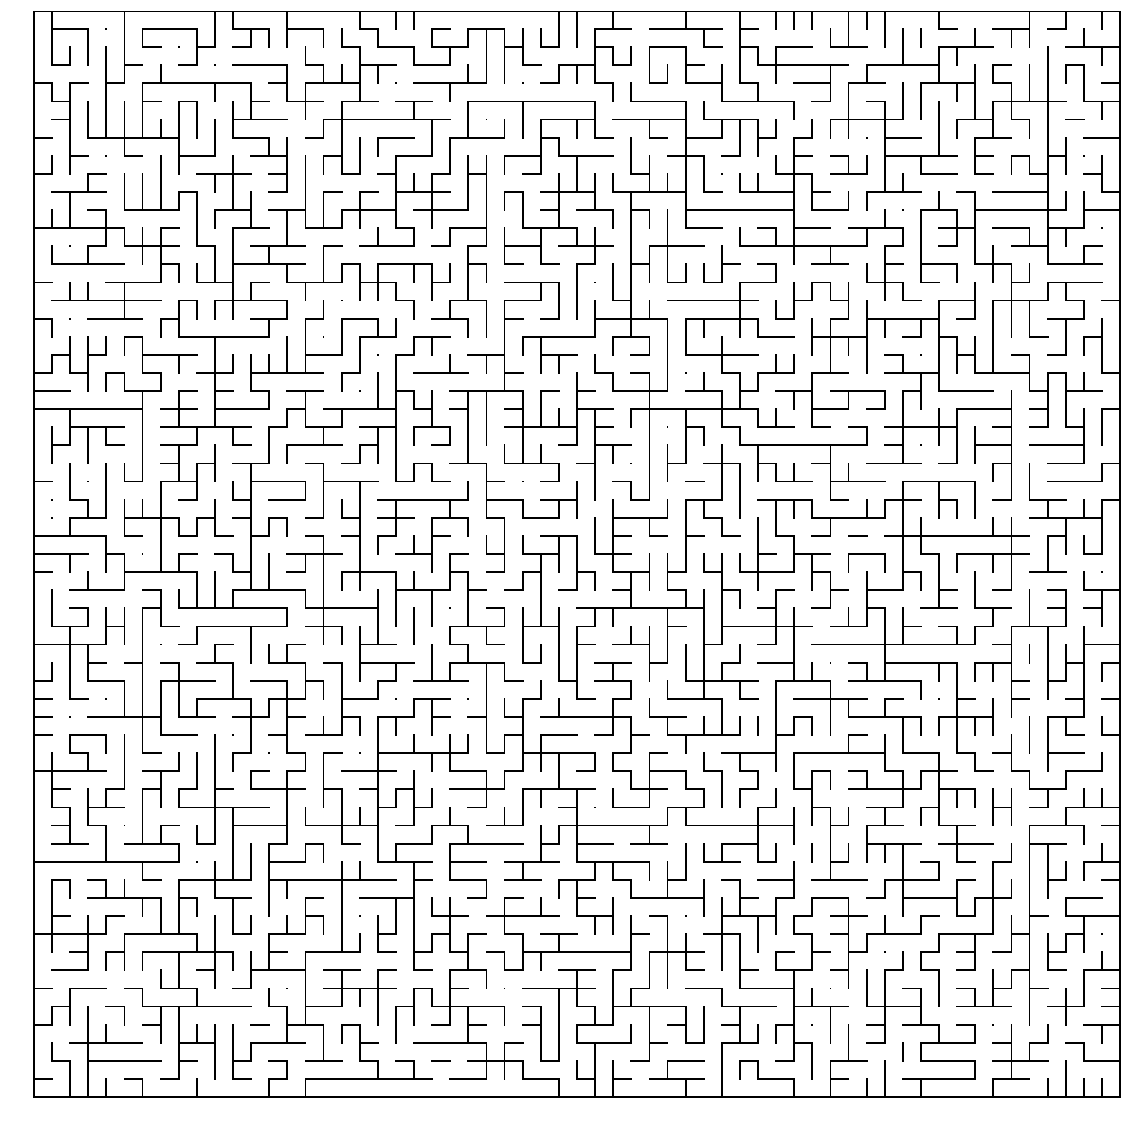

Removed 5420 walls.


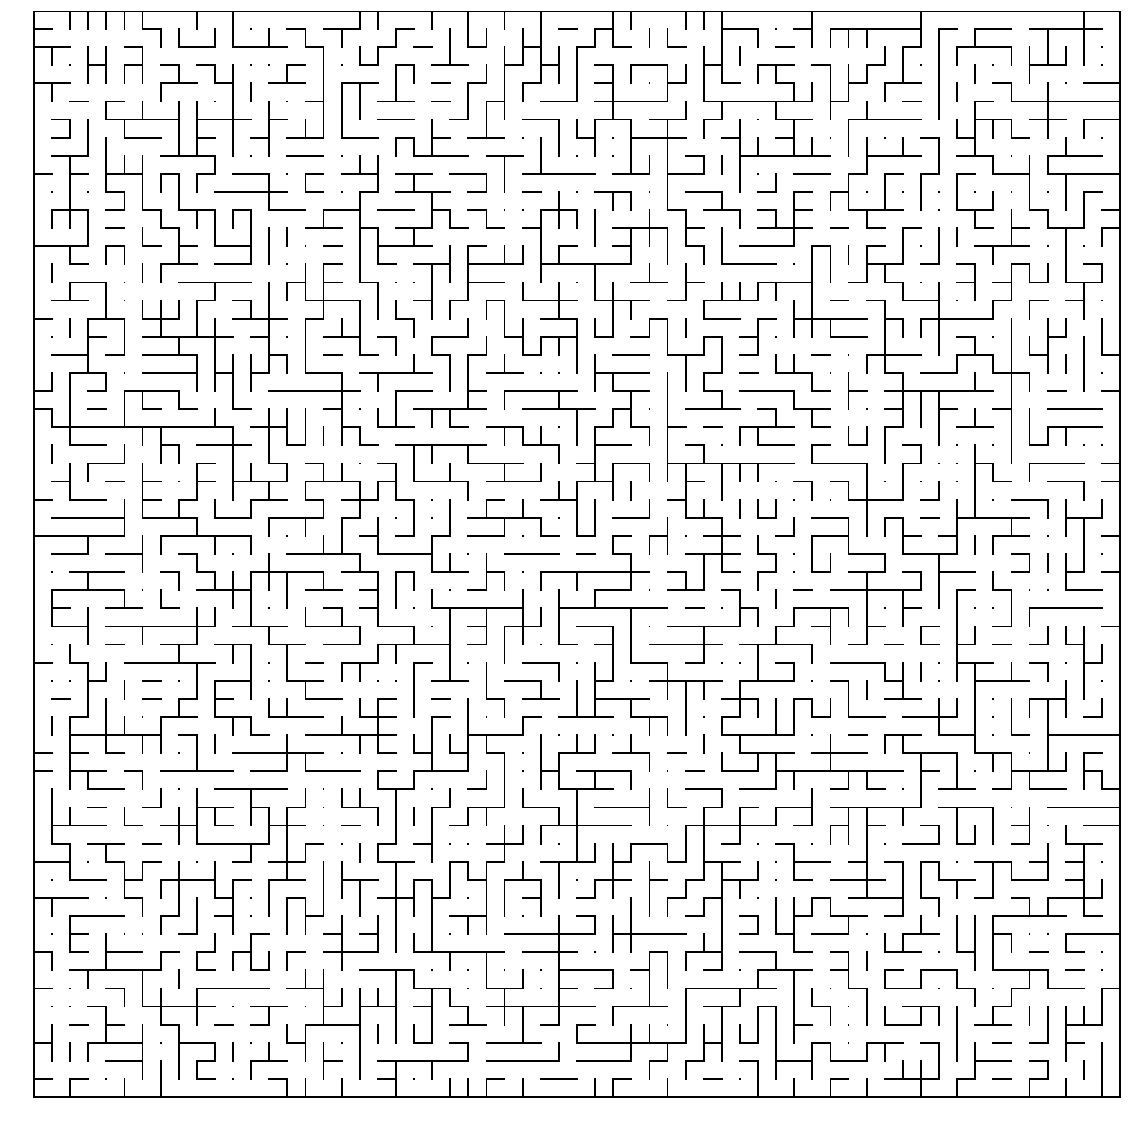

Removed 5217 walls.


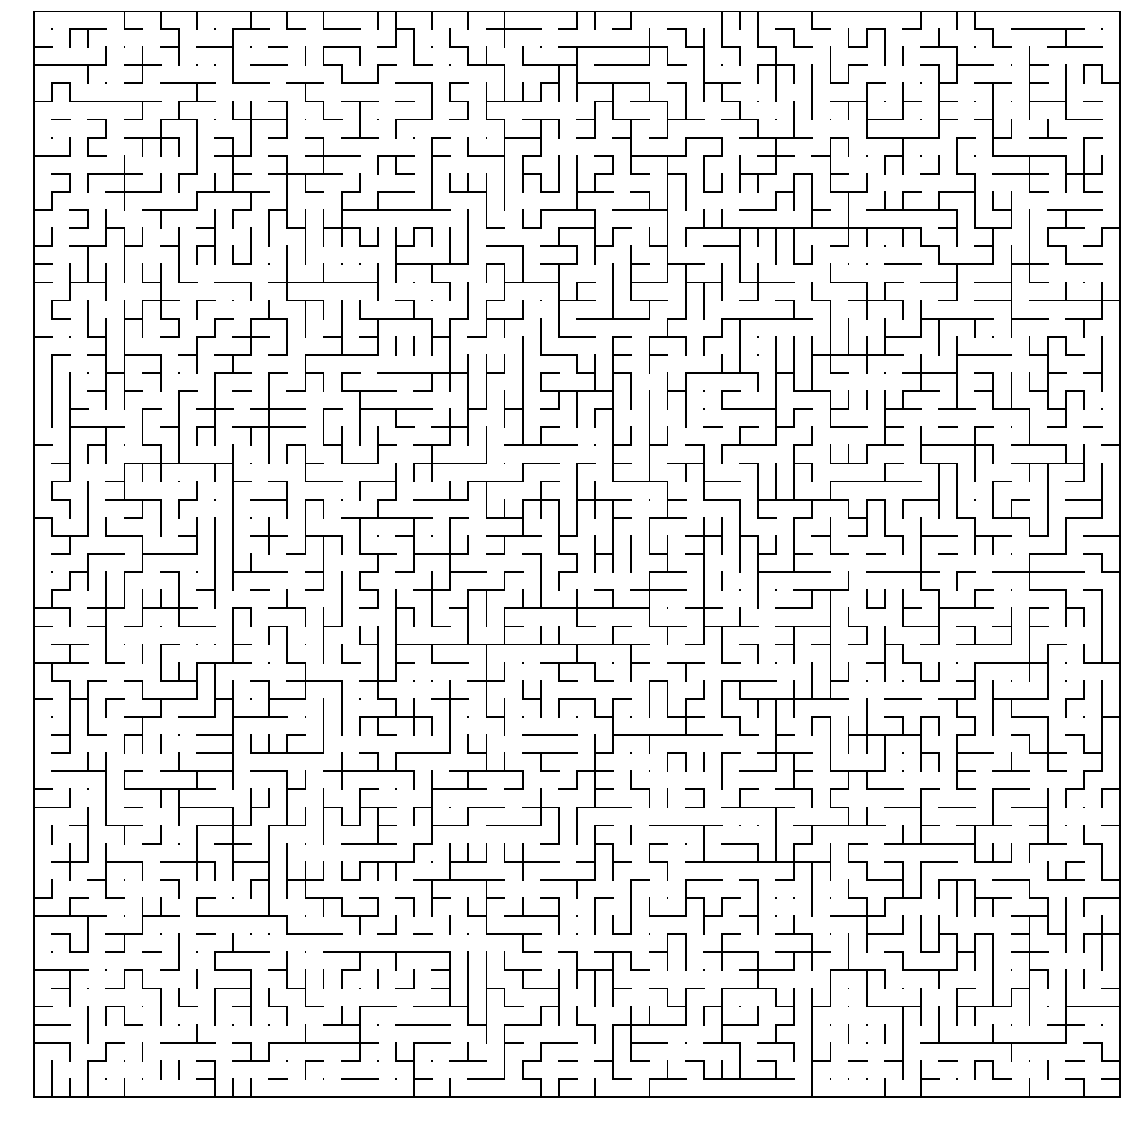

Removed 4584 walls.


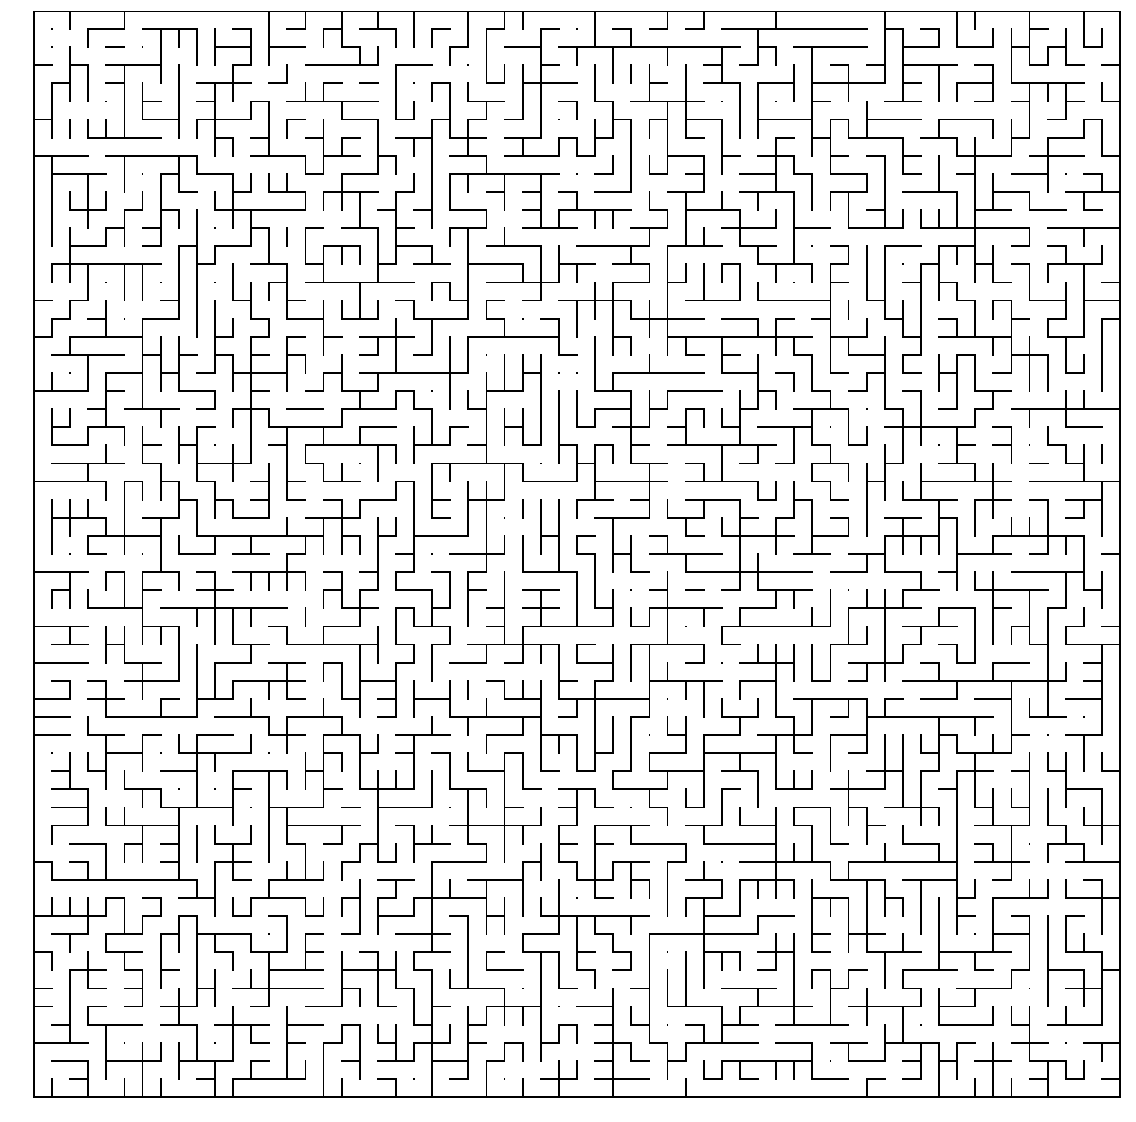

Removed 4591 walls.


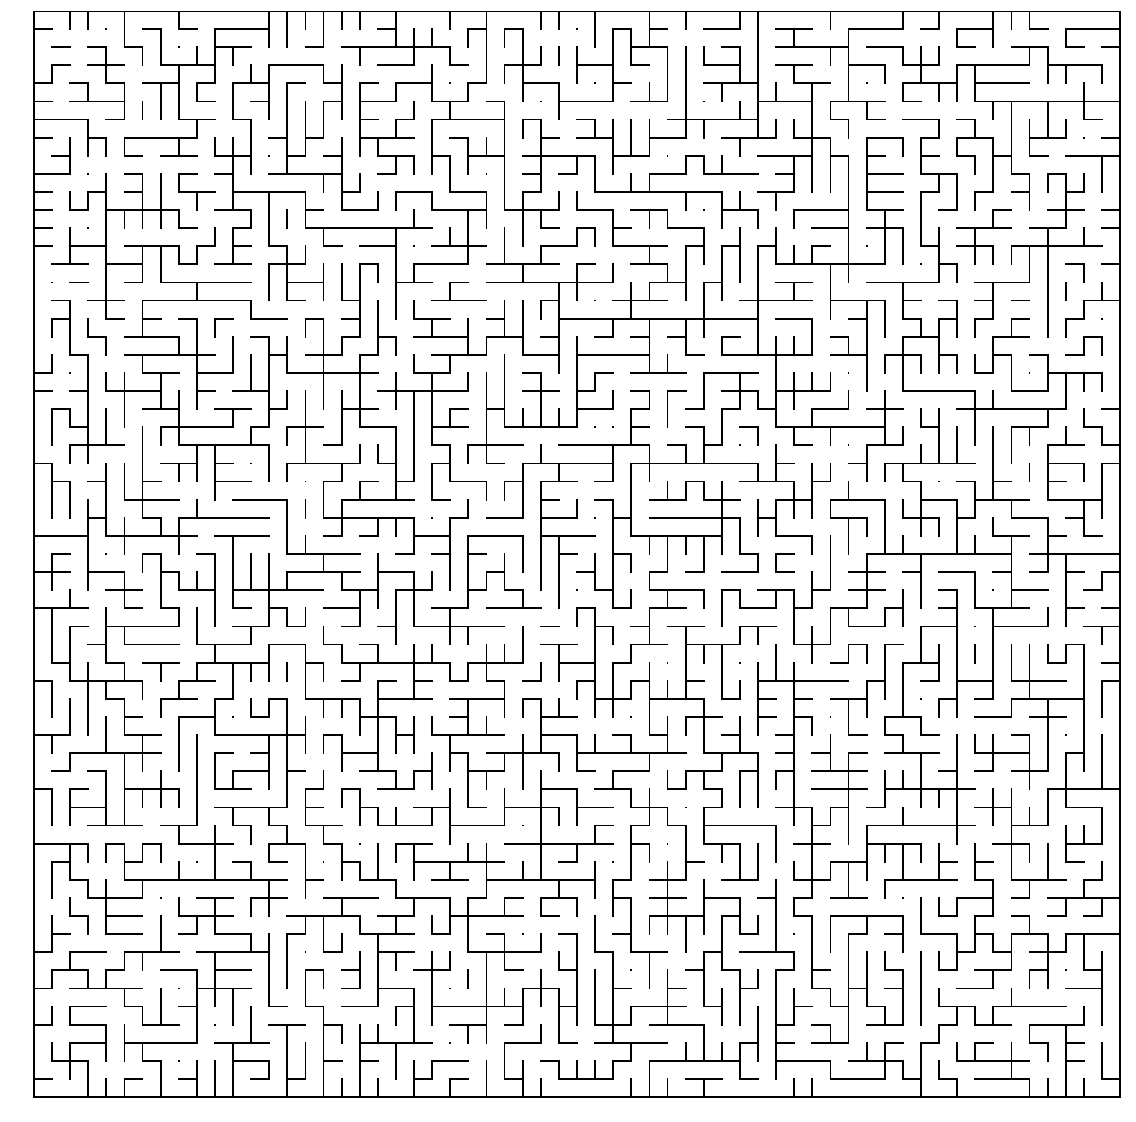

In [5]:
for i in range(5):
    maze.build_maze(60)